In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset

file_path = 'SMDM_Project_DataSet_V1.csv'
data = pd.read_csv(file_path)

validation_file_path = 'SMDM_Project_DataSet_V3.csv'
validation_data = pd.read_csv(validation_file_path)

# Data Exploration

print(data.head())

C:\Users\neeth\AppData\Local\Temp\ipykernel_45376\4030310805.py:10: DtypeWarning: Columns (41,82,97) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


   approved_at_utc  subreddit selftext author_fullname  saved  \
0              NaN       pics      NaN    t2_nvs8bgmct  False   
1              NaN  AskReddit      NaN     t2_a4d033l7  False   
2              NaN  AskReddit      NaN     t2_22a7spon  False   
3              NaN  AskReddit      NaN     t2_dbitrqbp  False   
4              NaN  AskReddit      NaN     t2_6lrmnwdz  False   

   mod_reason_title  gilded  clicked  \
0               NaN       0    False   
1               NaN       0    False   
2               NaN       0    False   
3               NaN       0    False   
4               NaN       0    False   

                                               title link_flair_richtext  ...  \
0                                                 48                  []  ...   
1  Ex Karen’s, what made you realize you were a K...                  []  ...   
2  What’s the worst name you’ve ever heard someon...                  []  ...   
3  What was the reason that made you decide 

C:\Users\neeth\AppData\Local\Temp\ipykernel_45376\4030310805.py:13: DtypeWarning: Columns (41,82,97) have mixed types. Specify dtype option on import or set low_memory=False.
  validation_data = pd.read_csv(validation_file_path)


In [111]:
data.columns

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'link_flair_template_id', 'is_gallery', 'media_metadata',
       'gallery_data', 'post_url_from_permalink', 'updated_ups', 'updated_at',
       'crosspost_parent_list', 'crosspost_parent', 'author_cakeday'],
      dtype='object', length=117)

In [112]:
validation_data.columns

Index(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved',
       'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext',
       ...
       'link_flair_template_id', 'is_gallery', 'media_metadata',
       'gallery_data', 'post_url_from_permalink', 'updated_ups', 'updated_at',
       'crosspost_parent_list', 'crosspost_parent', 'author_cakeday'],
      dtype='object', length=117)

In [113]:
data.head()

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,link_flair_template_id,is_gallery,media_metadata,gallery_data,post_url_from_permalink,updated_ups,updated_at,crosspost_parent_list,crosspost_parent,author_cakeday
0,NaN,pics,NaN,t2_nvs8bgmct,False,NaN,0,False,48,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/pics/comments/1jf4ouq/48/,54.0,2025-03-31 14:54:16,NaN,NaN,NaN
1,NaN,AskReddit,NaN,t2_a4d033l7,False,NaN,0,False,"Ex Karen’s, what made you realize you were a K...",[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4op...,0.0,2025-03-31 14:54:16,NaN,NaN,NaN
2,NaN,AskReddit,NaN,t2_22a7spon,False,NaN,0,False,What’s the worst name you’ve ever heard someon...,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4of...,27.0,2025-03-31 14:54:16,NaN,NaN,NaN
3,NaN,AskReddit,NaN,t2_dbitrqbp,False,NaN,0,False,What was the reason that made you decide to re...,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4o0...,1.0,2025-03-31 14:54:16,NaN,NaN,NaN
4,NaN,AskReddit,NaN,t2_6lrmnwdz,False,NaN,0,False,What is your city known for ?,[],...,NaN,NaN,NaN,NaN,https://reddit.com/r/AskReddit/comments/1jf4no...,9.0,2025-03-31 14:54:16,NaN,NaN,NaN


In [114]:
validation_data['author_cakeday'] = None
validation_data['post_url_from_permalink'] = None

In [115]:
sorted(data.columns.to_list())

['all_awardings',
 'allow_live_comments',
 'approved_at_utc',
 'approved_by',
 'archived',
 'author',
 'author_cakeday',
 'author_flair_background_color',
 'author_flair_css_class',
 'author_flair_richtext',
 'author_flair_template_id',
 'author_flair_text',
 'author_flair_text_color',
 'author_flair_type',
 'author_fullname',
 'author_is_blocked',
 'author_patreon_flair',
 'author_premium',
 'awarders',
 'banned_at_utc',
 'banned_by',
 'can_gild',
 'can_mod_post',
 'category',
 'clicked',
 'content_categories',
 'contest_mode',
 'created',
 'created_utc',
 'crosspost_parent',
 'crosspost_parent_list',
 'discussion_type',
 'distinguished',
 'domain',
 'downs',
 'edited',
 'gallery_data',
 'gilded',
 'gildings',
 'hidden',
 'hide_score',
 'id',
 'is_created_from_ads_ui',
 'is_crosspostable',
 'is_gallery',
 'is_meta',
 'is_original_content',
 'is_reddit_media_domain',
 'is_robot_indexable',
 'is_self',
 'is_video',
 'likes',
 'link_flair_background_color',
 'link_flair_css_class',
 'lin

In [116]:
# Drop columns that don't have any use to us 
drop_columns = [
    'all_awardings',
    'allow_live_comments',
    'approved_at_utc',
    'approved_by',
    'archived',
    'author',
    'author_cakeday',
    'author_flair_background_color',
    'author_flair_css_class',
    'author_flair_richtext',
    'author_flair_template_id',
    'author_flair_text',
    'author_flair_text_color',
    'author_flair_type',
    'author_fullname',
    'author_is_blocked',
    'author_patreon_flair',
    'author_premium',
    'awarders',
    'banned_at_utc',
    'banned_by',
    'can_gild',
    'can_mod_post',
    # 'category',
    'clicked',
    # 'content_categories',
    'contest_mode',
    # 'created',
    # 'created_utc',
    'crosspost_parent',
    'crosspost_parent_list',
    # 'discussion_type',
    'distinguished',
    'domain',
    # 'downs',
    'edited',
    'gallery_data',
    'gilded',
    'gildings',
    'hidden',
    'hide_score',
    'id',
    'is_created_from_ads_ui',
    'is_crosspostable',
    'is_gallery',
    'is_meta',
    'is_original_content',
    'is_reddit_media_domain',
    'is_robot_indexable',
    'is_self',
    # 'is_video',
    # 'likes',
    'link_flair_background_color',
    'link_flair_css_class',
    'link_flair_richtext',
    'link_flair_template_id',
    'link_flair_text',
    'link_flair_text_color',
    'link_flair_type',
    'locked',
    'media',
    'media_embed',
    'media_metadata',
    'media_only',
    'mod_note',
    'mod_reason_by',
    'mod_reason_title',
    'mod_reports',
    # 'name',
    'no_follow',
    # 'num_comments',
    # 'num_crossposts',
    # 'num_reports',
    # 'over_18',
    'permalink',
    'pinned',
    'post_hint',
    'post_url_from_permalink',
    'preview',
    'pwls',
    'quarantine',
    'removal_reason',
    'removed_by',
    'removed_by_category',
    'report_reasons',
    'saved',
    # 'score',
    'secure_media',
    'secure_media_embed',
    'selftext',
    'selftext_html',
    'send_replies',
    'spoiler',
    'stickied',
    # 'subreddit',
    'subreddit_id',
    'subreddit_name_prefixed',
    # 'subreddit_subscribers',
    # 'subreddit_type',
    'suggested_sort',
    'thumbnail',
    'thumbnail_height',
    'thumbnail_width',
    # 'title',
    'top_awarded_type',
    'total_awards_received',
    'treatment_tags',
    # 'updated_at',
    # 'updated_ups',
    # 'ups',
    # 'upvote_ratio',
    'url',
    'url_overridden_by_dest',
    # 'user_reports',
    # 'view_count',
    'visited',
    'wls'
]

In [117]:
data.drop(columns=drop_columns, axis=1, inplace=True)


In [118]:
validation_data.drop(columns=drop_columns, axis=1, inplace=True)

In [119]:
data.head()
data.columns.tolist()
numerical_columns = [
    "downs", 
    "ups", 
    "upvote_ratio", 
    "score", 
    "likes", 
    "view_count", 
    "num_comments", 
    "subreddit_subscribers", 
    "updated_ups", 
    "num_crossposts",
    "num_reports"
]

In [120]:
# Drop the useless numerical columns 
columns_to_drop = ["downs", "score", "likes", "view_count", "num_reports"]
columns_to_drop = [column for column in columns_to_drop if column in data.columns]
data.drop(
    columns_to_drop,
    axis=1,
    inplace=True
)
validation_data.drop(
    columns_to_drop,
    axis=1, 
    inplace=True
)

In [121]:
data.columns

Index(['subreddit', 'title', 'name', 'upvote_ratio', 'subreddit_type', 'ups',
       'user_reports', 'category', 'content_categories', 'created', 'over_18',
       'discussion_type', 'num_comments', 'subreddit_subscribers',
       'created_utc', 'num_crossposts', 'is_video', 'updated_ups',
       'updated_at'],
      dtype='object')

In [122]:
validation_data.columns

Index(['subreddit', 'title', 'name', 'upvote_ratio', 'subreddit_type', 'ups',
       'user_reports', 'category', 'content_categories', 'created', 'over_18',
       'discussion_type', 'num_comments', 'subreddit_subscribers',
       'created_utc', 'num_crossposts', 'is_video', 'updated_ups',
       'updated_at'],
      dtype='object')

In [123]:
non_numerical_columns = [column for column in data.columns if column not in numerical_columns]

In [124]:
data[non_numerical_columns].head()
# Cast non-numeric columns to appropriate data type 
data["subreddit"] = data["subreddit"].astype(str)
data["title"] = data["title"].astype(str) 
data["name"] = data["name"].astype(str)
data["subreddit_type"] = data["subreddit_type"].astype(str)
data["user_reports"] = data["user_reports"].astype(str) 
data["category"] = data["category"].astype(str)
data["content_categories"] = data["content_categories"].astype(str) 
data["created"] = data["created"].astype(str)
data["over_18"] = data["over_18"].astype(str)
data["discussion_type"] = data["discussion_type"].astype(str)
data["created_utc"] = data["created_utc"].astype(str)
data["is_video"] = data["is_video"].astype(str) # Cast to boolean 
data["updated_at"] = data["updated_at"].astype(str)

In [125]:
# Cast non-numeric columns to appropriate data type 
validation_data["subreddit"] = validation_data["subreddit"].astype(str)
validation_data["title"] = validation_data["title"].astype(str) 
validation_data["name"] = validation_data["name"].astype(str)
validation_data["subreddit_type"] = validation_data["subreddit_type"].astype(str)
validation_data["user_reports"] = validation_data["user_reports"].astype(str) # This is actually a list in string format - needs to be re-cast 
validation_data["category"] = validation_data["category"].astype(str)
validation_data["content_categories"] = validation_data["content_categories"].astype(str) 
validation_data["created"] = validation_data["created"].astype(str)
validation_data["over_18"] = validation_data["over_18"].astype(str)
validation_data["discussion_type"] = validation_data["discussion_type"].astype(str)
validation_data["created_utc"] = validation_data["created_utc"].astype(str)
validation_data["is_video"] = validation_data["is_video"].astype(str) # Cast to boolean 
validation_data["updated_at"] = validation_data["updated_at"].astype(str)

In [126]:
data["user_reports"].unique().tolist()
data["discussion_type"].unique().tolist()
data["content_categories"].unique().tolist()
data["content_categories"].value_counts()
data["subreddit_type"].unique().tolist()
data["category"].unique().tolist()

['nan']

In [127]:
columns_to_drop = ['user_reports', 'discussion_type', 'content_categories', 'subreddit_type', 'category']
columns_to_drop = [column for column in columns_to_drop if column in data.columns]
data.drop(
    columns_to_drop,
    axis=1,
    inplace=True
)
validation_data.drop(
    columns_to_drop,
    axis=1,
    inplace=True
)

In [128]:
#criterion for virality 
# 50% of posts have greater than 300 upvotes 
# Criterion for virality - If a post has greater than 3 upvotes, it is considered viral 
# What % of posts are viral - Roughly 50% 

In [129]:
data["viral"] = False 
data.loc[data["updated_ups"] >= 300, "viral"] = True 

In [130]:
data.columns

Index(['subreddit', 'title', 'name', 'upvote_ratio', 'ups', 'created',
       'over_18', 'num_comments', 'subreddit_subscribers', 'created_utc',
       'num_crossposts', 'is_video', 'updated_ups', 'updated_at', 'viral'],
      dtype='object')

In [131]:
validation_data["viral"] = False 
validation_data.loc[validation_data["updated_ups"] >= 300, "viral"] = True 

In [132]:
data["viral"].value_counts()

viral
False    8403
True      797
Name: count, dtype: int64

In [133]:
data["created"] = pd.to_datetime(
    pd.to_numeric(
        data["created"], 
        errors="coerce"
    ), 
    unit="s", 
    errors="coerce"
)


In [134]:
data

,subreddit,title,name,upvote_ratio,ups,created,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,updated_at,viral
0,pics,48,t3_1jf4ouq,1.00,1,2025-03-19 18:57:52,False,0,31807091,1742410672.0,0,False,54.0,2025-03-31 14:54:16,False
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",t3_1jf4op1,1.00,1,2025-03-19 18:57:42,False,0,52983358,1742410662.0,0,False,0.0,2025-03-31 14:54:16,False
2,AskReddit,What’s the worst name you’ve ever heard someon...,t3_1jf4off,1.00,1,2025-03-19 18:57:23,False,1,52983358,1742410643.0,0,False,27.0,2025-03-31 14:54:16,False
3,AskReddit,What was the reason that made you decide to re...,t3_1jf4o0c,1.00,2,2025-03-19 18:56:54,False,0,52983358,1742410614.0,0,False,1.0,2025-03-31 14:54:16,False
4,AskReddit,What is your city known for ?,t3_1jf4noe,1.00,2,2025-03-19 18:56:31,False,2,52983358,1742410591.0,0,False,9.0,2025-03-31 14:54:16,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,AskReddit,"If you were a cat for a day, what would you do?",t3_1johs7c,1.00,2,2025-03-31 23:44:01,False,10,53512123,1743464641.0,0,False,2.0,2025-04-04 04:51:31,False
9196,AskReddit,"Too much drink and you’re “drunk,” yet too muc...",t3_1johrvr,0.67,1,2025-03-31 23:43:37,False,5,53512123,1743464617.0,0,False,1.0,2025-04-04 04:51:31,False
9197,AskReddit,"If you could go back in time, what’s one thing...",t3_1johrgt,1.00,2,2025-03-31 23:43:03,False,13,53512123,1743464583.0,0,False,2.0,2025-04-04 04:51:31,False
9198,AskReddit,How do you get good at chess?,t3_1johrg2,1.00,3,2025-03-31 23:43:01,False,6,53512123,1743464581.0,0,False,3.0,2025-04-04 04:51:31,False


In [135]:
validation_data

,subreddit,title,name,upvote_ratio,ups,created,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,updated_at,viral
0,pics,48,t3_1jf4ouq,1.00,1,1742410672.0,False,0,31807091,1742410672.0,0,False,162.000000,2025-03-31 14:54:16,False
1,AskReddit,"Ex Karen’s, what made you realize you were a K...",t3_1jf4op1,1.00,1,1742410662.0,False,0,52983358,1742410662.0,0,False,0.000000,2025-03-31 14:54:16,False
2,AskReddit,What’s the worst name you’ve ever heard someon...,t3_1jf4off,1.00,1,1742410643.0,False,1,52983358,1742410643.0,0,False,81.000000,2025-03-31 14:54:16,False
3,AskReddit,What was the reason that made you decide to re...,t3_1jf4o0c,1.00,2,1742410614.0,False,0,52983358,1742410614.0,0,False,792.092554,2025-03-31 14:54:16,True
4,AskReddit,What is your city known for ?,t3_1jf4noe,1.00,2,1742410591.0,False,2,52983358,1742410591.0,0,False,9855.000000,2025-03-31 14:54:16,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,AskReddit,"If you were a cat for a day, what would you do?",t3_1johs7c,1.00,2,1743464641.0,False,10,53512123,1743464641.0,0,False,6.000000,2025-04-04 04:51:31,False
9196,AskReddit,"Too much drink and you’re “drunk,” yet too muc...",t3_1johrvr,0.67,1,1743464617.0,False,5,53512123,1743464617.0,0,False,430.139743,2025-04-04 04:51:31,True
9197,AskReddit,"If you could go back in time, what’s one thing...",t3_1johrgt,1.00,2,1743464583.0,False,13,53512123,1743464583.0,0,False,6.000000,2025-04-04 04:51:31,False
9198,AskReddit,How do you get good at chess?,t3_1johrg2,1.00,3,1743464581.0,False,6,53512123,1743464581.0,0,False,6300.000000,2025-04-04 04:51:31,True


In [136]:
validation_data["created"] = pd.to_datetime(
    pd.to_numeric(
        validation_data["created"], 
        errors="coerce"
    ), 
    unit="s", 
    errors="coerce"
)

In [137]:
def get_time_of_day_from_datetime(datetime_value):
    hour = datetime_value.hour 
    if hour >= 5 and hour < 12:
        return "morning"
    elif hour >= 12 and hour < 16:
        return "afternoon"
    elif hour >= 16 and hour < 20:
        return "evening"
    else:
        return "night"

In [138]:
data["time_of_day"] = data["created"].apply(lambda x : get_time_of_day_from_datetime(x))

In [139]:
validation_data["time_of_day"] = validation_data["created"].apply(lambda x : get_time_of_day_from_datetime(x))

In [140]:
# Further reduce the size of the data set - dropping columns that are not useful for modelling 
columns_to_drop = [
    "name", 
    "created", 
    "updated_at"
]
columns_to_drop = [column for column in columns_to_drop if column in data.columns]
data.drop(columns_to_drop, axis=1, inplace=True)

In [141]:
# Further reduce the size of the data set - dropping columns that are not useful for modelling 
columns_to_drop = [
    "name", 
    "created", 
    "updated_at"
]
columns_to_drop = [column for column in columns_to_drop if column in validation_data.columns]
validation_data.drop(columns_to_drop, axis=1, inplace=True)

In [142]:
subreddits = data["subreddit"].to_list()
subreddits.append("other")

In [143]:
# Apply LabelEncoder to transform sub-reddit names and time of day 
from sklearn.preprocessing import LabelEncoder, StandardScaler
le_sub_reddit_names = LabelEncoder().fit(subreddits)
data["subreddit"] = le_sub_reddit_names.transform(data["subreddit"])

In [144]:
subreddits = [x if x in le_sub_reddit_names.classes_ else "other" for x in validation_data["subreddit"].to_list()]
validation_data["subreddit"] = le_sub_reddit_names.transform(subreddits)

In [145]:
le_time_of_day = LabelEncoder().fit(data["time_of_day"])

In [146]:
data["time_of_day"] = le_time_of_day.transform(data["time_of_day"])

In [147]:
validation_data["time_of_day"] = le_time_of_day.transform(validation_data["time_of_day"])

In [148]:
# Transform boolean columns to numeric 
data["over_18"] = data["over_18"].astype("bool")
data.loc[data["over_18"] == True, "over_18"] = 1
data.loc[data["over_18"] == False, "over_18"] = 0

C:\Users\neeth\AppData\Local\Temp\ipykernel_45376\1435265281.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[data["over_18"] == True, "over_18"] = 1


In [149]:
# Transform boolean columns to numeric 
validation_data["over_18"] = validation_data["over_18"].astype("bool")
validation_data.loc[data["over_18"] == True, "over_18"] = 1
validation_data.loc[data["over_18"] == False, "over_18"] = 0

C:\Users\neeth\AppData\Local\Temp\ipykernel_45376\2359812378.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  validation_data.loc[data["over_18"] == True, "over_18"] = 1


In [150]:
data["viral"] = data["viral"].astype("int")
# Replace True with 1, False with 0
data['viral'] = data['viral'].replace({True: 1, False: 0})


In [151]:
# First, replace the 'True'/'False' strings with actual boolean values (True/False)
#validation_data["is_video"] = validation_data["is_video"].replace({"True": True, "False": False})

# Explicitly cast the column to boolean (if it's not already) and then to integer
#validation_data["is_video"] = validation_data["is_video"].astype(bool).astype(int)


In [152]:
validation_data.head()


,subreddit,title,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,viral,time_of_day
0,37,48,1.0,1,1,0,31807091,1742410672.0,0,False,162.000000,False,1
1,0,"Ex Karen’s, what made you realize you were a K...",1.0,1,1,0,52983358,1742410662.0,0,False,0.000000,False,1
2,0,What’s the worst name you’ve ever heard someon...,1.0,1,1,1,52983358,1742410643.0,0,False,81.000000,False,1
3,0,What was the reason that made you decide to re...,1.0,2,1,0,52983358,1742410614.0,0,False,792.092554,True,1
4,0,What is your city known for ?,1.0,2,1,2,52983358,1742410591.0,0,False,9855.000000,True,1


[LightGBM] [Info] Number of positive: 633, number of negative: 6727
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014374 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16178
[LightGBM] [Info] Number of data points in the train set: 7360, number of used features: 517
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.086005 -> initscore=-2.363414
[LightGBM] [Info] Start training from score -2.363414
Accuracy: 0.9347826086956522
Precision: 0.7682926829268293
Recall: 0.38414634146341464
F1 Score: 0.5121951219512195

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1676
           1       0.77      0.38      0.51       164

    accuracy                           0.93      1840
   macro avg       0.86      0.69      0.74      1840
weighted avg       0.93      0.93      0.92      1840


Confusion Matrix:
[[1657   1

c:\Users\neeth\hw\smdm\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


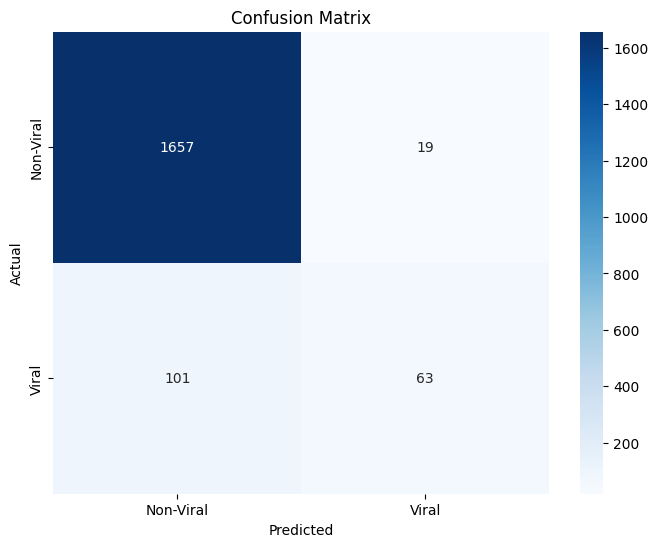

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer




#Define features (X) and target variable (y)
X = data.drop(columns=['viral'])  # Features
X = validation_data.drop(columns=['updated_ups'])
y = data['viral']  # Target variable

# Define the columns that are categorical and need encoding
categorical_cols = ['subreddit', 'over_18', 'is_video']  # Add any other categorical columns here
textual_cols = ['title']  # Column containing text

# Step 6: Create a preprocessor for text and categorical columns
# - TF-IDF for text columns
# - One-Hot Encoding for categorical columns
# - Standard scaling for numeric columns

preprocessor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(), 'title'), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols), 
        ('num', StandardScaler(), X.select_dtypes(include=['float64', 'int64']).columns)  
    ])


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('model', lgb.LGBMClassifier(objective='binary', metric='binary_error'))  
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')


print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

#  Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Viral', 'Viral'], yticklabels=['Non-Viral', 'Viral'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [154]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9195    0
9196    0
9197    0
9198    0
9199    0
Name: viral, Length: 9200, dtype: int64

In [155]:
X_train.shape

(7360, 12)

In [156]:
y_test.shape

(1840,)

In [157]:
y_pred.shape

(1840,)

In [158]:
data.head()

,subreddit,title,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,viral,time_of_day
0,37,48,1.0,1,1,0,31807091,1742410672.0,0,False,54.0,0,1
1,0,"Ex Karen’s, what made you realize you were a K...",1.0,1,1,0,52983358,1742410662.0,0,False,0.0,0,1
2,0,What’s the worst name you’ve ever heard someon...,1.0,1,1,1,52983358,1742410643.0,0,False,27.0,0,1
3,0,What was the reason that made you decide to re...,1.0,2,1,0,52983358,1742410614.0,0,False,1.0,0,1
4,0,What is your city known for ?,1.0,2,1,2,52983358,1742410591.0,0,False,9.0,0,1


In [159]:

validation_data["viral"] = validation_data["viral"].astype("int")
# Replace True with 1, False with 0
validation_data['viral'] = validation_data['viral'].replace({True: 1, False: 0})
validation_data.head()

,subreddit,title,upvote_ratio,ups,over_18,num_comments,subreddit_subscribers,created_utc,num_crossposts,is_video,updated_ups,viral,time_of_day
0,37,48,1.0,1,1,0,31807091,1742410672.0,0,False,162.000000,0,1
1,0,"Ex Karen’s, what made you realize you were a K...",1.0,1,1,0,52983358,1742410662.0,0,False,0.000000,0,1
2,0,What’s the worst name you’ve ever heard someon...,1.0,1,1,1,52983358,1742410643.0,0,False,81.000000,0,1
3,0,What was the reason that made you decide to re...,1.0,2,1,0,52983358,1742410614.0,0,False,792.092554,1,1
4,0,What is your city known for ?,1.0,2,1,2,52983358,1742410591.0,0,False,9855.000000,1,1


In [160]:

numerical_columns

['downs',
 'ups',
 'upvote_ratio',
 'score',
 'likes',
 'view_count',
 'num_comments',
 'subreddit_subscribers',
 'updated_ups',
 'num_crossposts',
 'num_reports']

In [161]:
# Check data types of columns in validation_data
print(validation_data.dtypes)


subreddit                  int64
title                     object
upvote_ratio             float64
ups                        int64
over_18                   object
num_comments               int64
subreddit_subscribers      int64
created_utc               object
num_crossposts             int64
is_video                  object
updated_ups              float64
viral                      int64
time_of_day                int64
dtype: object


In [162]:
print(data.dtypes)

subreddit                  int64
title                     object
upvote_ratio             float64
ups                        int64
over_18                   object
num_comments               int64
subreddit_subscribers      int64
created_utc               object
num_crossposts             int64
is_video                  object
updated_ups              float64
viral                      int64
time_of_day                int64
dtype: object


Accuracy score with validation data: 0.5728260869565217
Precision with validation data: 0.986046511627907
Recall with validation data: 0.13956550362080317
F1 Score with validation data: 0.24452133794694347

Classification Report on Validation Set:
              precision    recall  f1-score   support

           0       0.54      1.00      0.70      4643
           1       0.99      0.14      0.24      4557

    accuracy                           0.57      9200
   macro avg       0.76      0.57      0.47      9200
weighted avg       0.76      0.57      0.48      9200


Confusion Matrix:
[[4634    9]
 [3921  636]]


c:\Users\neeth\hw\smdm\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


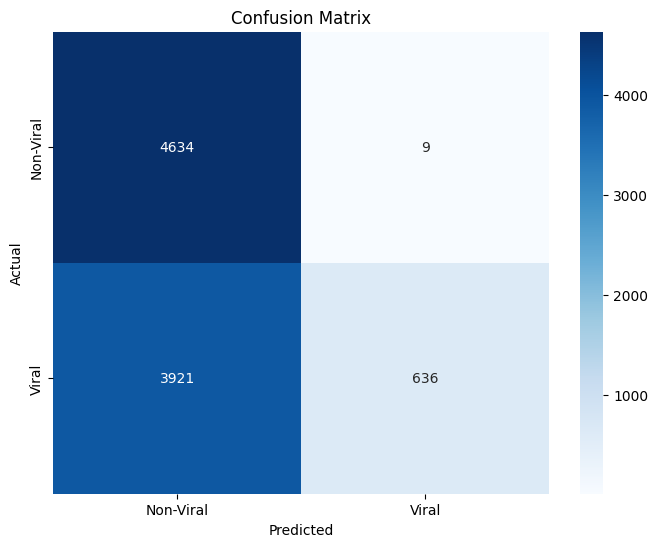

In [163]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report




X_val = validation_data.drop(columns=['viral'])  # Features
X_val = validation_data.drop(columns=['updated_ups'])
y_val = validation_data['viral']  # Target variable


y_val_pred = pipeline.predict(X_val)

#  Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred)
recall_val = recall_score(y_val, y_val_pred)
f1_val = f1_score(y_val, y_val_pred)

# Print the evaluation metrics
print(f'Accuracy score with validation data: {accuracy_val}')
print(f'Precision with validation data: {precision_val}')
print(f'Recall with validation data: {recall_val}')
print(f'F1 Score with validation data: {f1_val}')


print("\nClassification Report on Validation Set:")
print(classification_report(y_val, y_val_pred))

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Viral', 'Viral'], yticklabels=['Non-Viral', 'Viral'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





In [164]:
X_val

data["viral"].value_counts()

viral
0    8403
1     797
Name: count, dtype: int64